# Grover algorithm

In [2]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
import time

from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram
# from qiskit_textbook.tools import random_state

In [3]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

In [7]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), n)

In [8]:
def cccZ():
    #Triple Control Z Rotation
    # Rotate on the Z axis when 3 controlled qubit are 1
    qc = QuantumCircuit(4)
    qc.cp(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cp(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cp(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    gate = qc.to_gate(label=' cccZ')
    return gate

In [13]:
circ = makeCirc(4, '1110')
circ.h(3)
circ.append(cccZ(), [0,1,2,3])

Init state =  1110


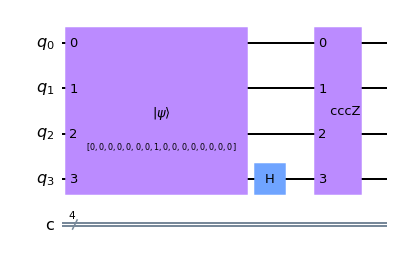

In [14]:
circ.draw()

/Users/biboo/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


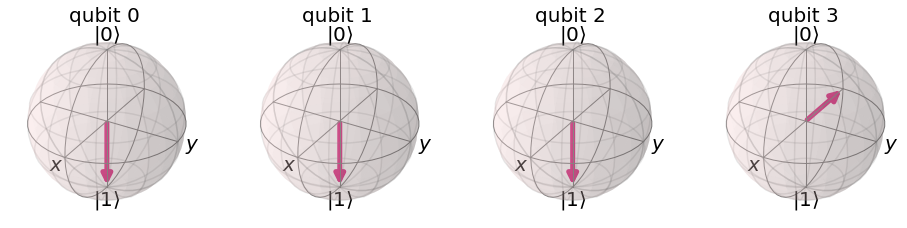

In [15]:
getBloch(circ)

In [16]:
def groverDiffusionOp():
    #Inversion along the mean
    circ = QuantumCircuit(4)
    circ.h(range(4))
    circ.x(range(4))
    circ.append(cccZ(), [0, 1, 2, 3])
    circ.x(range(4))
    circ.h(range(4))
    gate = circ.to_gate(label=" Diffusion")
    return gate

In [17]:
def groverOracle(n):
    #Takes in 4-bit string and returns Gate
    #Grover Oracle
    #Inversion
    circ = QuantumCircuit(4)
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    circ.append(cccZ(), [0, 1, 2, 3])
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    gate = circ.to_gate(label=' Grover Oracle')
    return gate

In [18]:
def groverIterate(inp):
    circ = QuantumCircuit(4)
    circ.append(groverOracle(inp), [0, 1, 2, 3])
    circ.append(groverDiffusionOp(), [0, 1, 2, 3])
    gate = circ.to_gate(label = ' Grover Iterate')
    return gate

In [19]:
circ = makeCirc(4, '0000')
circ.h(range(4))

Init state =  0000


In [20]:
circ.append(groverIterate('0010'), [0,1,2,3])
circ.append(groverIterate('0010'), [0,1,2,3])
# Repeat sqrt(N) time

In [21]:
circ.measure(range(4), range(4))

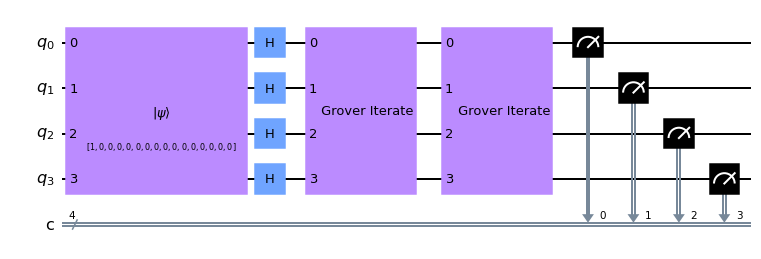

In [22]:
circ.draw()

In [23]:
getMeasure(circ, 10)

['0111',
 '1111',
 '1101',
 '0101',
 '1001',
 '1010',
 '0001',
 '0011',
 '1011',
 '0110',
 '1100',
 '0100',
 '1110',
 '1000',
 '0000',
 '0010',
 '0101',
 '1000',
 '1110',
 '0000',
 '0100',
 '1100',
 '1010',
 '1111',
 '1101',
 '0011',
 '0001',
 '0110',
 '1001',
 '1011',
 '0111',
 '0010',
 '1110',
 '1010',
 '1001',
 '1011',
 '0101',
 '1000',
 '0100',
 '1100',
 '1101',
 '1111',
 '0001',
 '0011',
 '0111',
 '0110',
 '0000',
 '0010',
 '0101',
 '1010',
 '1110',
 '1011',
 '0100',
 '1100',
 '1000',
 '0111',
 '0110',
 '0011',
 '0001',
 '1001',
 '1111',
 '1101',
 '0000',
 '0010',
 '0000',
 '1010',
 '1000',
 '1011',
 '0111',
 '1101',
 '1111',
 '1001',
 '0110',
 '0011',
 '0001',
 '0100',
 '1100',
 '1110',
 '0101',
 '0010',
 '1011',
 '1110',
 '0111',
 '1101',
 '1111',
 '1001',
 '0101',
 '0011',
 '0001',
 '0110',
 '1100',
 '0100',
 '1010',
 '0010',
 '0000',
 '1000',
 '1001',
 '0000',
 '0101',
 '1010',
 '1100',
 '0100',
 '0110',
 '0001',
 '0011',
 '1101',
 '1111',
 '0111',
 '1011',
 '1110',
 '1000',
 

## Barebone example

Init state =  0000


/Users/biboo/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


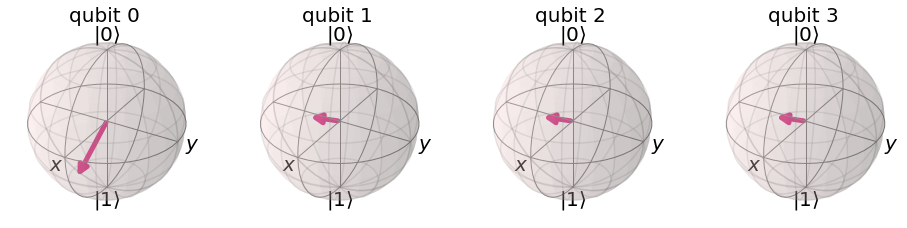

/Users/biboo/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


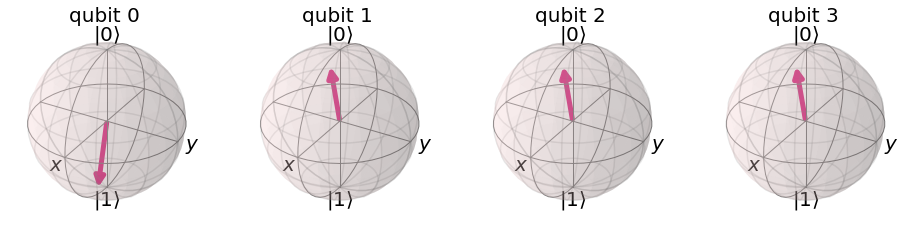

/Users/biboo/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


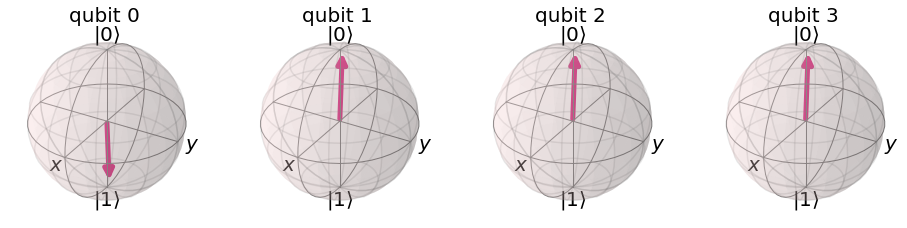

In [12]:
#barebone
circ = makeCirc(4, '0000')
circ.h(range(4))
n = '0001'
for i in range(3):
    # n=3 is optimum value
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    circ.cp(pi/4, 0, 3)
    circ.cx(0, 1)
    circ.cp(-pi/4, 1, 3)
    circ.cx(0, 1)
    circ.cp(pi/4, 1, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
        
    circ.h(range(4))
    circ.x(range(4))
    circ.cp(pi/4, 0, 3)
    circ.cx(0, 1)
    circ.cp(-pi/4, 1, 3)
    circ.cx(0, 1)
    circ.cp(pi/4, 1, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.cx(1, 2)
    circ.cp(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cp(pi/4, 2, 3)
    circ.x(range(4))
    circ.h(range(4))
    display(getBloch(circ));
circ.measure(range(4), range(4))

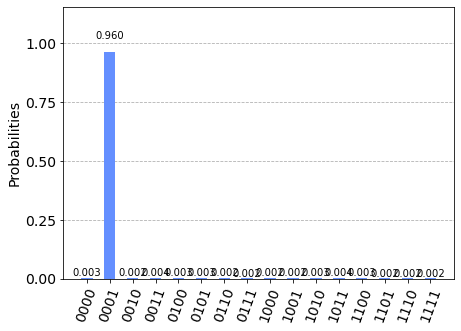

In [64]:
plot_histogram(getHistogram(4096, circ));

In [65]:
array_to_latex(getPTrace(circ, [0,1,2]))

<IPython.core.display.Latex object>

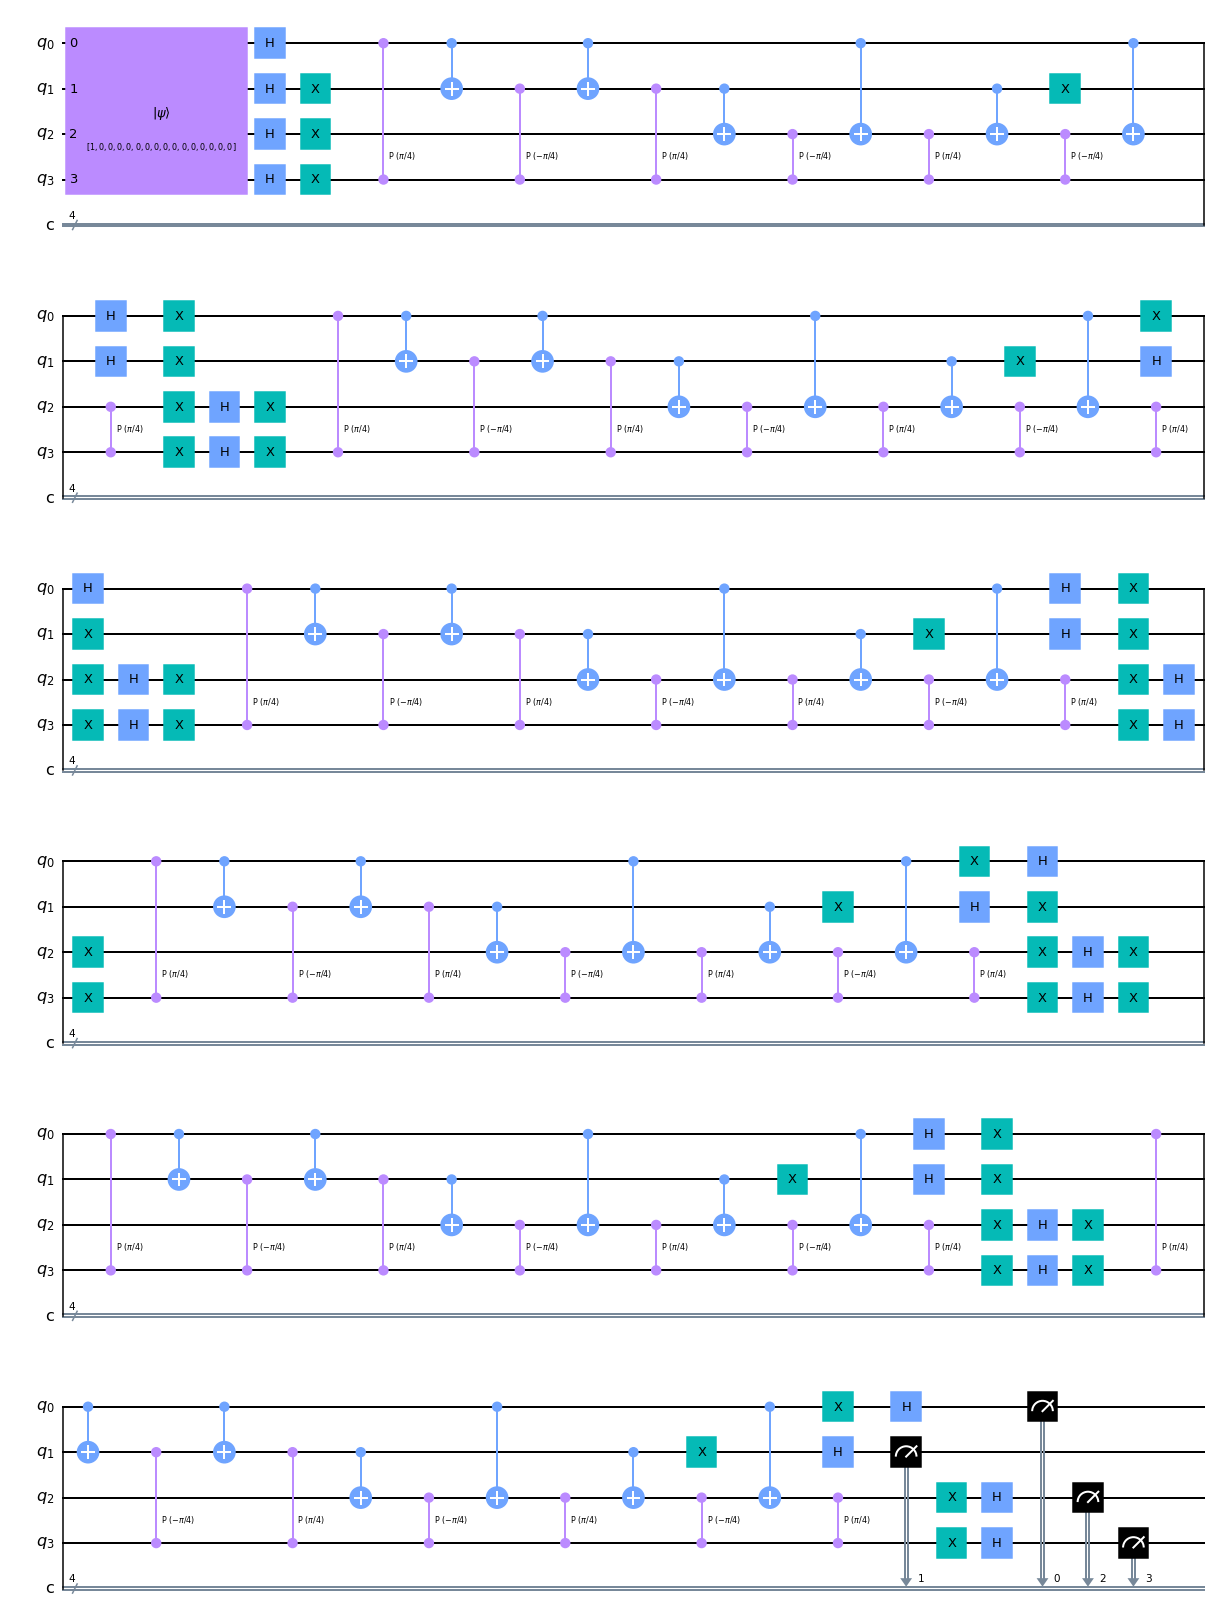

In [69]:
circ.draw();